In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import time

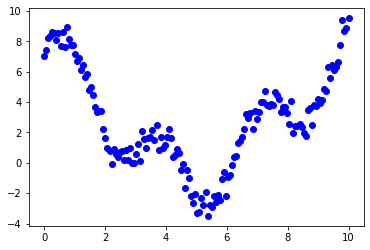

In [2]:
n = 150
X_data = np.linspace(0,10,n)
X_data = X_data.reshape((n,1))
Y_data = np.sin(X_data) + 2* np.sin(2 * X_data) + 0.3 * (X_data - 5)**2 
data_no_noise = np.concatenate((X_data, Y_data), axis=1)

Y_data += np.random.normal(0, 0.5, [n,1])

plt.plot(X_data, Y_data, 'bo')
plt.show()

In [3]:
data = np.concatenate((X_data, Y_data), axis=1)
data_eval = data.copy()

np.random.shuffle(data)

data_tr, data_val, data_test = np.split(data, [int(0.8*n), int(0.8*n)+int(0.1*n)], axis = 0)
print(data_tr.shape, data_val.shape, data_test.shape)
n_tr, n_val, n_test = data_tr.shape[0], data_val.shape[0], data_test.shape[0]


(120, 2) (15, 2) (15, 2)


In [4]:
def next_batch(data_tr, i, batch_size):
    return data_tr[i*batch_size:(i+1)*batch_size-1, :]  


In [5]:
# Parameters
learning_rate = 0.01
num_epochs = 3000
batch_size = 20
display_step = 100
wd_par = 0.01

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 1 # MNIST data input (img shape: 28*28)
num_output = 1 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder(tf.float32, shape = [None, 1])
Y = tf.placeholder(tf.float32, shape = [None, 1])

In [6]:
# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_output]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_output]))
}

In [7]:
# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))
    # Output fully connected layer 
    out_layer = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])
    return out_layer

In [8]:
# Construct model
fp = neural_net(X)

# Define loss and optimizer
error = tf.reduce_sum(tf.pow(fp-Y, 2))
loss = n_tr / batch_size * tf.reduce_sum(tf.pow(fp-Y, 2)) \
            + wd_par * tf.reduce_sum([tf.reduce_sum(tf.pow(weights[i], 2)) for i in weights])
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

W0908 11:26:55.290274 10540 deprecation.py:323] From C:\Users\afpsa\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1375: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
sess = tf.Session()
sess.run(init)


In [10]:
training_loss = [sess.run(loss, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]}) / data_tr.shape[0]]
validation_error = [sess.run(error, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / data_val.shape[0]]
i = 0

itpep = data_tr.shape[0] // batch_size
tic = time.perf_counter()

for iteration in range(num_epochs * itpep):

    data_batch = next_batch(data_tr, i, batch_size)
    sess.run(train_op, feed_dict={X: data_batch[:, [0]], Y: data_batch[:, [1]]})
    
    if (iteration + 1) % itpep == 0:
        i = 0
        training_loss.append(sess.run(loss, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]}) / data_tr.shape[0])
        validation_error.append(sess.run(error, feed_dict={X: data_val[:, [0]], Y: data_val[:, [1]]}) / data_val.shape[0])
    else:
        i += 1
    
    if (iteration + 1) % (display_step * itpep) == 0 or iteration == 0:
        loss_disp = sess.run(loss, feed_dict={X: data_tr[:, [0]], Y: data_tr[:, [1]]})
        print("Epoch:", '%04d' % ((iteration + 1) // itpep), "loss=", "{:.9f}".format(loss_disp))

toc = time.perf_counter()

print("Optimization Finished!")

Epoch: 0000 loss= 46018.585937500
Epoch: 0100 loss= 983.969360352
Epoch: 0200 loss= 610.495056152
Epoch: 0300 loss= 487.459930420
Epoch: 0400 loss= 348.697692871
Epoch: 0500 loss= 314.771881104
Epoch: 0600 loss= 283.400238037
Epoch: 0700 loss= 276.150146484
Epoch: 0800 loss= 254.689758301
Epoch: 0900 loss= 247.589202881
Epoch: 1000 loss= 237.452819824
Epoch: 1100 loss= 227.851882935
Epoch: 1200 loss= 219.891876221
Epoch: 1300 loss= 213.444122314
Epoch: 1400 loss= 208.935562134
Epoch: 1500 loss= 204.825988770
Epoch: 1600 loss= 202.396179199
Epoch: 1700 loss= 199.376159668
Epoch: 1800 loss= 198.490737915
Epoch: 1900 loss= 196.208190918
Epoch: 2000 loss= 210.975997925
Epoch: 2100 loss= 184.608474731
Epoch: 2200 loss= 222.497116089
Epoch: 2300 loss= 214.973129272
Epoch: 2400 loss= 189.027435303
Epoch: 2500 loss= 208.712402344
Epoch: 2600 loss= 194.151077271
Epoch: 2700 loss= 218.189025879
Epoch: 2800 loss= 205.320007324
Epoch: 2900 loss= 202.581283569
Epoch: 3000 loss= 179.470489502
Optimi

In [130]:
print(f"Run in {toc - tic:0.4f} seconds")

Run in 29.2871 seconds


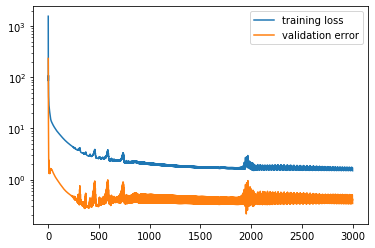

In [12]:
plt.yscale('log')
plt.plot(np.arange(len(training_loss)), training_loss, label = 'training loss')
plt.plot(np.arange(len(training_loss)), validation_error, label = 'validation error')
plt.legend()
plt.show()

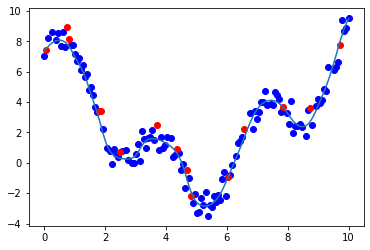

In [13]:
plt.plot(data_tr[:, [0]], data_tr[:, [1]], 'bo')
plt.plot(data_test[:, [0]], data_test[:, [1]], 'ro')
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}))
plt.show()

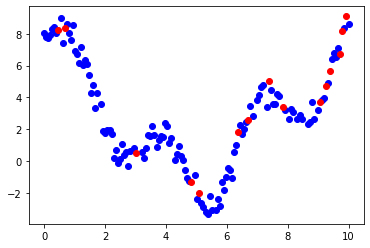

In [104]:
plt.plot(data_tr[:, [0]], data_tr[:, [1]], 'bo')
plt.plot(data_test[:, [0]], data_test[:, [1]], 'ro')
plt.show()

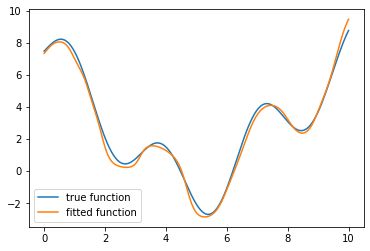

In [14]:
plt.plot(data_no_noise[:, [0]], data_no_noise[:, [1]], label = 'true function')
plt.plot(data_eval[:, [0]], sess.run(fp, feed_dict = {X: data_eval[:, [0]]}), label = 'fitted function')
plt.legend()
plt.show()